# Data Science Capstone Final Assignment 

## Table of Contents
1.  <a href="#item1">Introduction (Business Problem)</a>
2.  <a href="#item2">Data Sources</a>  
3.  <a href="#item3">Assumptions & Approach</a>  
4.  <a href="#item4">Data Wranggling</a>  
5.  <a href="#item5">Analysis and conclusion</a>  

<a id="item1"></a>

## <u><p style="color:Blue;">1. Introduction (Business Problem)</p></u>  
### <b>An investor is looking for good business opportunity in the city Chennai.</b>   


The south Indian city of Chennai is fast emerging as a destination for information technology outsourcing and has seen a growing number of IT parks being built here. Most of the upcoming complexes are being built along the I T Corridor and the southern suburb.
These IT parks are hubs for major companies and employs educated segment of Indian Society especially youth fresh from Universities in large number.

The youth with new financial independence enjoy drinking and to socialise after work. 


### <b>Hence, opening a Pub near upcoming IT park maybe a good real estate investment.</b>

<p style="color:dark green;"><i>For this problem we need to do Spatial and other Data Analysis on how Pubs/Bar are located/distributed near an IT park.</i></p>

<hr>
<hr>

<a id="item2"></a>

##   <u><p style="color:Blue;">2. Data Sources</p></u>

For the above, we need the list of IT parks (sample data and not exhaustive list) and the current Pubs near IT parks. 
The list of IT park in Chennai was available on Wikipedia and list of bars/pubs near IT parks have been obtained through Foursquare API.
<ol>
    <li><b>Data Source 1:</b> Wikipedia link of list of IT parks and Construction Status, i.e., Completed, Planning or Under construction</li>
    <li><b>Data Source 2:</b> Postal code of locations in Chennai to use to find pubs/bars around (within 5kms) those pincodes through foursquare. This list gives list of pubs/bars in the City. </li>
    <li><b>Data Source 3:</b> Pubs/bars near (within 3kms) IT Pubs using the Foursquare. </li>
</ol>
             
<hr>
<hr>

<a id="item3"></a>

##  <u><p style="color:Blue;">3. Assumptions & Approach</p></u>

### Assumptions
1. The impact of following has been assumed not to affect the decision of the investment:
<ol type="i">
    <li>Density of population and income distribution of the particular area</li>
    <li>Universities, tourist places or other popular, other commercial offices/places, infrastructure development of the area, overall popularity/history of the area</li>
    <li>availability and prices of land/rental spaces in area</li>
    <li>The footfall and profitability (number of people visiting the pubs/bars) of the bars/pubs</li>
    <li>Investor financial constraints</li>
</ol>
    

2. This is part of Coursera Data Science assignment which mandates the use of 'Foursquare API'. This API has its inherent limitations which have created basis on account of following:
<ol type="i">
    <li>Limitation of only 50 items per API call, hence completeness is not confirmed</li>
    <li>The categorisation of venues is considered as per Foursquare API</li>
    <li>API version is used for Dec 31, 2020</li>
</ol>     


 3. The Wikipedia source is not updated as on date and further the completeness of this source has not been verified. However, for this analysis, this source is considered a reasonable sample. Furthermore, relevant updates, has been made by verifying through internet search.


 
 4. Others Assumptions:
  <ol type='i'>
  <li>Places which are tagged or categorised as restaurants have been excluded, these may serve alcohol. The focus of the research here on investment in pubs and bars near to an IT park. </li>
   
<hr>
    
### Approach
The approach has been to gather source data, wrangle the data, perform exploratory analysis, especially Spatial Analysis and to conclude the observations in relation to premise and suggesting if investment in pubs/bars is a good opportunity. 
<hr>
<hr>  

<a id="item4"></a>

##  <u><p style="color:Blue;">4. Data Wranggling</p></u>

#### The following tabs has code for data geather, data cleaning & exploratory analysis 

In [1]:
import pandas as pd #importing pandas for scarpping data from URL(wikipedia page)
import geopy.geocoders#importing gecode library for location (latitude and longitude) mapping
import folium # importing folium for map
import numpy as np
import requests
from pandas.io.json import json_normalize
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://en.wikipedia.org/wiki/List_of_tech_parks_in_Chennai' #All IT parks near Chennai
df = pd.read_html(url, attrs={"class": "wikitable sortable"})[0] # 0 is for the 1st table in this particular page
df_raw=df.copy()#making copy of the data

Data Source 1: IT park list of Chennai

1. Exploring data for validation, completeness, understanding and missing values
2. Adding the null address with help internet search for input
3. Adding the status of IT parks for null values with help internet search for input
4. Creating another column 'Area' for simplification. This includes only the Area (not complete Address) of the IT parks
5. Updating the Area values (where required) through internet search
6. Renaming IT park name were incorrect
7. Deleting the rows with insufficient or incorrect values
8. Simplifying the status of IT parks for better categorisation
9. Resetting the index

In [3]:
#Adding missing elements. The address and status of IT park(company name) looked up online and updated.
#Steps 2 and 3

df.iloc[4,2]="Mahindra city"
df.iloc[36,2]="Teynampet"
df.iloc[91,2]="Oggiyamduraipakkam"
df.iloc[52,2]="Sholinganallur"

df.iloc[2,4]='Completed'
df.iloc[15,4]='Completed'
df.iloc[108,4]='Completed'

In [4]:
df['Area']=df['Address']#the Areas of IT parks (step 4)

In [5]:
#upding correct Areas (step 5)

df.iloc[1,6]='Pattabiram'
df.iloc[5,6]='Chromepet'
df.iloc[10,6]='Sholinganallur'
df.iloc[9,6]='Thoraipakkam'
df.iloc[12,6]='Thoraipakkam'
df.iloc[15,6]='GST Road'
df.iloc[20,6]='CIT Nagar'
df.iloc[21,6]='Mylapore'
df.iloc[22,6]='Guindy Industrial Estate'
df.iloc[23,6]='Navalur'
df.iloc[25,6]='Sholinganallur'
df.iloc[31,6]='Ambattur Industrial Estate'
df.iloc[32,6]='Perungudi'
df.iloc[41,6]='Thoraipakkam'
df.iloc[42,6]='Kilpauk'
df.iloc[44,6]='Mount Road'
df.iloc[45,6]='Egmore'
df.iloc[49,6]='Thoraipakkam'
df.iloc[50,6]='Santhome'
df.iloc[51,6]='Tiruvanmiyur'
df.iloc[54,6]='Guindy Industrial Estate'
df.iloc[56,6]='Perungudi'
df.iloc[57,6]='Thoraipakkam'
df.iloc[59,6]='Teynampet'
df.iloc[61,6]='Egmore'
df.iloc[62,6]='Chetpet'
df.iloc[63,6]='Chetpet'
df.iloc[65,6]='Guindy Industrial Estate'
df.iloc[66,6]='Royappet'
df.iloc[67,6]='T.Nagar'
df.iloc[68,6]='Ambattur Industrial Estate'
df.iloc[69,6]='Ekkaduthangal'
df.iloc[70,6]='Porur'
df.iloc[72,6]='Porur'
df.iloc[73,6]='Porur'
df.iloc[74,6]='Mylapore'
df.iloc[79,6]='GST Road'
df.iloc[80,6]='Ambattur Industrial Estate'
df.iloc[84,6]='Aminjikarai'
df.iloc[86,6]='Perungudi'
df.iloc[89,6]='Adyar'
df.iloc[90,6]='Adyar'
df.iloc[93,6]='Thoraipakkam'
df.iloc[94,6]='Thoraipakkam'
df.iloc[101,6]='Sholinganallur'
df.iloc[103,6]='Kelambakkam'
df.iloc[105,6]='Ambattur Industrial Estate'
df.iloc[109,6]='Ambattur Industrial Estate'
df.iloc[106,6]='Thoraipakkam'
df.iloc[110,6]='Karapakkam'


In [6]:
#renaming IT park(columns name "Company Name") and removing IT park rows which are not proper(step 6 and 7)

df['Company name'].replace(to_replace="ceebros (seshachalam building??)",value="Seshachalam",inplace=True)
df=df[~df['Company name'].str.contains('unnamed')]
df=df[~df['Company name'].str.contains('Aroha e-serve')]
df=df[~df['Company name'].str.contains('Ramky wavoo developers')]
df=df[~df['Company name'].str.contains('RCTECH')]
df=df[~df['Company name'].str.contains('Maansarovar properties - Techno creek')]
df=df[~df['Company name'].str.contains('Times square')]

In [7]:
#Replacing the status of IT park data with simplified values to have better categorization  (Step 8)

df['Start datecurrent status'].replace(to_replace=['2000','2002','2006','2007','2008','2009'],value="Completed", inplace=True)
df['Start datecurrent status'].replace(to_replace=["Construction Going On","UC"], value="Under Construction", inplace=True)
df['Start datecurrent status'].replace(to_replace=["PLANNING","Planning"], value="Not Started", inplace=True)

In [8]:
#Reset index(step 9)
df.reset_index(inplace=True)

### <b><p style="color:red"> Exploratory Analyis 1:</p></b>
- Creating the bar chart to show classification of IT parks basis their construction status
- Mapping these IT park basis their construction status 
- Pivot tables analysis to check which area has more IT parks and what are the respective status

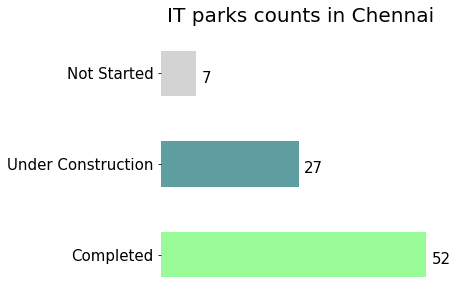

In [9]:
#Creating bar chart to check the IT park count as per status 

ax=(df['Start datecurrent status'].value_counts()).plot(kind="barh",
                                                     figsize=(5,5), 
                                                     color=['palegreen','cadetblue','lightgrey'],
                                                     fontsize=15,
                                                     grid=False)
ax.set_title(fontsize=20,label="IT parks counts in Chennai", color='Black')
ax.spines['left'].set_visible(False)#removing the left border of the chart
ax.spines['right'].set_visible(False)#removing the right border of the chart
ax.spines['top'].set_visible(False)#removing the top  border of the chart
ax.spines['bottom'].set_visible(False)
plt.xticks([])


for p in ax.patches:
    width,height=p.get_width(),p.get_height()
    x,y=p.get_xy()
    ax.annotate('{}'.format(width),(x+width+1,y+0.15),size=15)
    
plt.savefig("IT_counts.png")

In [10]:
#getting geocodes for maping these IT parks

df['Location']=df["Company name"]+','+df['Area']+', Chennai, Tamil Nadu' #combining the complete address for
nom=geopy.geocoders.ArcGIS()
df["Coordinates"]=df["Location"].apply(nom.geocode)#getting the gecode of the location
df["Latitude"]=df["Coordinates"].apply(lambda x: x.latitude)#mapping latitute
df["Longitude"]=df["Coordinates"].apply(lambda x: x.longitude)#mapping longitude

In [11]:
#creating the map

def color_producer(status):
    if status=="Completed":
        return "lightgreen"
    elif status=="Under Construction":
        return "cadetblue"
    else:
        return "lightgray"

Chennai=nom.geocode("Chennai, Tamil Nadu")[1]
IT_Park_Chennai = folium.Map(location=[Chennai[0],Chennai[1]], zoom_start=11)

# add markers to map
for lat, lng, status,name,area in zip(df['Latitude'], df['Longitude'], df['Start datecurrent status'],df['Company name'],df['Area']):
    label = '{},{}'.format(name,area)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(location=[lat,lng],popup=label,icon=folium.Icon(color=color_producer(status))).add_to(IT_Park_Chennai)

display(IT_Park_Chennai)
                                                                           

#### <p style="color:red">Analysis: Most of the IT parks on the southern borders of the city and its is getting further expanded with new constructions further north and south</p>


##### The main area where Majority of the IT parks are located in certain area of the city. The following table shows the counts of the top 5 IT parks in each areas:

In [12]:
(pd.pivot_table(df, values=["Company name"],index="Area", aggfunc='count')).sort_values("Company name" , axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last').head(5)

,Company name
Area,
Perungudi,8
Thoraipakkam,7
Taramani,5
Sholinganallur,5
Ambattur Industrial Estate,4


The following table shows which areas have more under construction IT parks. 

-The above data is analysied to see if the Bar/Pubs in the city also follow similar pattern. That is to check if the Area where there are more IT park has more bars/pubs.


### <p style="color:blue"> Data Source 2: Extracting and mapping the Pubs/bars in Chennai to analyse the distribution of these places within the city.</p>

1. Importing pincode of Chennai through Beautiful Soup and creating a dataframe
2. Adding location column to the Dataframe and Generating Geocodes for each postal area
3. Extracting bars/pubs in 5km of each postal area. The 5km is used as an approximation of each postal code area. 
4. Mapping the pubs on the map
5. Mapping the pubs and the IT parks on the Map


In [13]:
import requests
import bs4
zips=[]
url2 = 'https://www.livechennai.com/chennaipincodes_pinwise.asp' #All zip code of chennai
get_data=requests.get(url2)
soup=bs4.BeautifulSoup(get_data.text,'lxml')
tables=soup.find_all('tr',{'class': 'dark'})
for table in tables:
    data=table.find_all('td')
    for d in data:
        x=d.find('p').text
        zips.append(x)
pincode=pd.DataFrame(zips[1::2],columns=["Area"])
pincode['Pincode']=pd.DataFrame(zips[2::2],columns=None)

In [14]:
pincode["location"]=pincode['Area']+","+pincode['Pincode']+', Chennai, Tamil Nadu'
nom=geopy.geocoders.ArcGIS()
pincode["Coordinates"]=pincode["location"].apply(nom.geocode)#getting the gecode of the location
pincode["Latitude"]=pincode["Coordinates"].apply(lambda x: x.latitude)#mapping latitute
pincode["Longitude"]=pincode["Coordinates"].apply(lambda x: x.longitude)#mapping longitude

In [15]:
# FourSquare API credentials
CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # Foursquare Secret
ACCESS_TOKEN = '' # your FourSquare Access Token
VERSION = '20201231'

In [16]:
LIMIT = 100 #since API only give 50 items it doent matter what is the top limit here
search =['pub','bar','club'] # terms for API to search for

In [17]:
#Extracting data from API
radius =5000
City_pubs=[]
for s in search:
    for i in range(pincode.shape[0]):
        latitude =pincode.Latitude[i]
        longitude =pincode.Longitude[i]
        search_query=s
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
        results = requests.get(url).json()
        venue = results['response']['venues']
        y= json_normalize(venue)
        y['location']=pincode['location'][i]
        City_pubs.append(y)
Chennai_Pubs=pd.concat(City_pubs)

Chennai_Pubs_copy.to_csv("pub_list.csv")

In [18]:
# Reading the file saved from above code, to stop rerun of the above code as there is daily limitation to API call
Chennai_Pubs=pd.read_csv("pub_list.csv")

In [19]:
# Dropping not required columns
Chennai_Pubs.drop(columns=['id','referralId','hasPerk','location.address','location.crossStreet',
                 'location.labeledLatLngs','location.postalCode', 'location.cc','location.city','location.state',
                 'location.country','location.formattedAddress'],inplace=True)

In [20]:
#Spliting column data to add proper category column
category=Chennai_Pubs.categories.apply(lambda x: pd.Series(str(x).split(":")))
category=category[3].apply(lambda x: pd.Series(str(x).split(",")))

Chennai_Pubs["Category"]=category[0]

In [21]:
# Filtering required category for analysis as API serach also included irrelevant items. E.g. serach word Pub included Public 

filter_category=['Bars','Nightclubs','Pubs','Other Nightlife','Roof Decks','Rock Clubs',
                  'Lounges','nan','Breweries','Wineries','Nightlife Spots']

Pubs_list_filtered=[]
for c in filter_category:
    Pubs_list_filtered.append(Chennai_Pubs[Chennai_Pubs['Category'].str.contains('{}'.format(c))])
City_Pubs=pd.concat(Pubs_list_filtered)

In [22]:
#Removing not required items from the filtered category based on the name of the place/venue

incorrect=['Tasmac','Resto','Restaurant','Hotel',"Alumni",'Juice','juice',
           'travel','Travel','Snack','snack','Bank','bank','Pool','Associat','Tower','TASMAC','Gym','fitness',
          'Fitness','Clubhouse','Nagar','Hookah','BARBER','Barita','DJ Console','barad\'s','Publications','Public','Airport',
           'Cool Bar',"Soltini ko tongBa",'fresh','Fresh','Publishers','cool bar','Sltini ko tongBa']

for i in incorrect:
    City_Pubs=City_Pubs[~City_Pubs['name'].str.contains('{}'.format(i))]

In [23]:
# Merging the Pubs/bars with same location but bit fuzzy name, essentailly removing duplicates

City_Pubs.replace(to_replace=["HiSide Bar","70mm Bar",'Arcot Bar - Trident','Club Lounge @ Westin','D olphin Bar',
                                 'Rain Tree Bar','Voodo Bar','Xtasy Bar'],
                     value=["HI-Side bar",'70 mm bar','Arcot Bar','Club Lounge',
                            'Dolphin Garden Bar','Raintree Bar','Voodoo Bar',"XTASY"]
                     ,inplace=True)

In [24]:
# droping duplicates
City_Pubs.drop_duplicates(subset=['location.lat','location.lng'], keep='first', inplace=True, ignore_index=False)

City_Pubs.drop_duplicates(subset=['name'], keep='first', inplace=True, ignore_index=False)

In [25]:
#Mapping these Pubs/bars on the map
Chennai=nom.geocode("Chennai, Tamil Nadu")[1]
citypubs= folium.Map(location=[Chennai[0],Chennai[1]], zoom_start=11)

# add markers to map
for lat, lng,name in zip(City_Pubs['location.lat'],City_Pubs['location.lng'], City_Pubs['name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='orange',
        fill=True,
        fill_color='beige',
        fill_opacity=1,
        parse_html=False).add_to(citypubs)


display(citypubs)

### Lets see the mapping of these Bars with the IT parks location   

In [26]:
Chennai=nom.geocode("Chennai, Tamil Nadu")[1]
bars_And_IT_Park= folium.Map(location=[Chennai[0],Chennai[1]], zoom_start=11)

# add markers to map
for lat, lng,name in zip(City_Pubs['location.lat'],City_Pubs['location.lng'], City_Pubs['name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='orange',
        fill=True,
        fill_color='beige',
        fill_opacity=1,
        parse_html=False).add_to(bars_And_IT_Park)
    
for lat, lng, status,name,area in zip(df['Latitude'], df['Longitude'], df['Start datecurrent status'],df['Company name'],df['Area']):
    label = '{},{}'.format(name,area)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(location=[lat,lng],popup=label,icon=folium.Icon(color=color_producer(status))).add_to(bars_And_IT_Park)

display(bars_And_IT_Park)


<p style="color:red">We can observe that majority of the bars are concentrated in certain area of the city, especially where the number of completed IT parks are more. There are at least a bar/pubs near each completed IT park, except one, which seems far away from Chennai city.</p>

It can further be observed that new IT parks (under construction/not started) are also getting planned where there already bars/pubs.
    
<p style="color:red">Lastly, there are few bars/pubs where there are no IT parks, but these are individual places and not cluster of bars. 
A further option can be evaluated to see if opening an IT park around these bars/pubs would be good/financially viable. This is currently out of the research of this topic.</p>
    
Since, majority of pubs and bar are within few kms of the IT park. We will further explore how many bars are around each IT park within 3kms radius. 



### <p style="color: Purple"> Repeating above steps for specific pubs/bars data around the IT parks </p>  

In [27]:
LIMIT = 1000
radius =3000
search =['pub','bar','club']

In [28]:
frames=[]
for s in search:
    for i in range(df.shape[0]):
        latitude = df.Latitude[i]
        longitude = df.Longitude[i]
        search_query=s
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&oauth_token={}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude,ACCESS_TOKEN, VERSION, search_query, radius, LIMIT)
        results = requests.get(url).json()
        venue = results['response']['venues']
        x= json_normalize(venue)
        x['IT Park']=(df['Company name'][i])
        x['Area']=(df['Area'][i])
        x['IT_lat']=(df.Latitude[i])
        x['IT_lng']=(df.Longitude[i])
        x['Status']=(df['Start datecurrent status'][i])
        frames.append(x)
Pubs=pd.concat(frames)

Pubs.to_csv("Pubs.csv")

In [29]:
Pubs=pd.read_csv("Pubs.csv")

In [30]:
Pubs.columns

Index(['Unnamed: 0', 'id', 'name', 'categories', 'referralId', 'hasPerk',
       'location.lat', 'location.lng', 'location.labeledLatLngs',
       'location.distance', 'location.cc', 'location.country',
       'location.formattedAddress', 'location.address', 'location.city',
       'location.state', 'location.crossStreet', 'location.postalCode',
       'IT Park', 'Area', 'IT_lat', 'IT_lng', 'Status',
       'location.neighborhood', 'venuePage.id'],
      dtype='object')

In [31]:
Pubs.drop(columns=['Unnamed: 0',"id",'referralId','hasPerk','location.address','location.crossStreet',
                 'location.labeledLatLngs','location.postalCode', 'location.cc','location.city','location.state',
                 'location.country','location.formattedAddress','venuePage.id','location.neighborhood'], inplace=True)
Pubs.head()

,name,categories,location.lat,location.lng,location.distance,IT Park,Area,IT_lat,IT_lng,Status
0,Turf Pub,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",12.973404,80.265942,2566,Tidel Park,Taramani,12.99013,80.24966,Completed
1,Recharge - Lounge Bar,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",12.983469,80.246303,826,Tidel Park,Taramani,12.99013,80.24966,Completed
2,Public Enemies Enclave,"[{'id': '4bf58dd8d48988d11f941735', 'name': 'N...",12.971968,80.224411,3404,Tidel Park,Taramani,12.99013,80.24966,Completed
3,unity public school,"[{'id': '4bf58dd8d48988d13d941735', 'name': 'H...",13.010713,80.245933,2326,Tidel Park,Taramani,12.99013,80.24966,Completed
4,"The Indian Public School, Perungudi Campus (TIPS)","[{'id': '4bf58dd8d48988d13b941735', 'name': 'S...",12.957743,80.247160,3615,Tidel Park,Taramani,12.99013,80.24966,Completed


In [32]:
category=Pubs.categories.apply(lambda x: pd.Series(str(x).split(":")))
category=category[3].apply(lambda x: pd.Series(str(x).split(",")))

Pubs["Category"]=category[0]

In [33]:
filter_category=['Bars','Nightclubs','Pubs','Other Nightlife','Roof Decks','Rock Clubs',
                  'Lounges','nan','Breweries','Wineries','Nightlife Spots']

Pubs_filtered=[]
for c in filter_category:
    Pubs_filtered.append(Pubs[Pubs['Category'].str.contains('{}'.format(c))])
Pubs=pd.concat(Pubs_filtered)

In [34]:
incorrect=['Tasmac','Resto','Restaurant','Hotel',"Alumni",'Juice','juice',
           'travel','Travel','Snack','snack','Bank','bank','Pool','Associat','Tower','TASMAC','Gym','fitness',
          'Fitness','Clubhouse','Nagar','Hookah','BARBER','Barita','DJ Console','barad\'s','Publications','Public','Airport',
           'Cool Bar',"Soltini ko tongBa",'fresh','Fresh','Publishers','cool bar','Sltini ko tongBa']
for i in incorrect:
    Pubs=Pubs[~Pubs['name'].str.contains('{}'.format(i))]

In [35]:
Pubs.drop_duplicates(subset=['location.lat','location.lng','IT Park'], keep='first', inplace=True, ignore_index=False)

In [36]:
Pubs['name'].replace(to_replace=["HiSide Bar","70mm Bar",'Arcot Bar - Trident','Club Lounge @ Westin','D olphin Bar',
                                 'Rain Tree Bar','Voodo Bar','Xtasy Bar'],
                     value=["HI-Side bar",'70 mm bar','Arcot Bar','Club Lounge',
                            'Dolphin Garden Bar','Raintree Bar','Voodoo Bar',"XTASY"]
                     ,inplace=True)

In [37]:
Pubs.drop_duplicates(subset=['name','IT Park'], keep='first', inplace=True, ignore_index=False)

In [38]:
Pubs.reset_index(inplace=True)

<a id="item7"></a>

In [39]:
Chennai=nom.geocode("Chennai, Tamil Nadu")[1]
Pubs_IT_Park= folium.Map(location=[Chennai[0],Chennai[1]], zoom_start=11)

# add markers to map
for lat, lng,name in zip(Pubs['location.lat'],Pubs['location.lng'],Pubs['name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=6,
        popup=label,
        color='orange',
        fill=True,
        fill_color='beige',
        fill_opacity=1,
        parse_html=False).add_to(Pubs_IT_Park)
    
for lat, lng, status,name,area in zip(df['Latitude'], df['Longitude'], df['Start datecurrent status'],df['Company name'],df['Area']):
    label = '{},{}'.format(name,area)
    label = folium.Popup(label, parse_html=True)
    folium.Marker(location=[lat,lng],popup=label,icon=folium.Icon(color=color_producer(status))).add_to(Pubs_IT_Park)

display(Pubs_IT_Park)

In [40]:
pivot2=pd.pivot_table(Pubs, values="name",index=["IT Park","Area"], columns='Status',aggfunc='count')
print("Average Number of Bars near Completed IT Park: ",(pivot2["Completed"].mean()))
print("Average Number of Bars near Under construnction IT Park: ",(pivot2["Under Construction"].mean()))
print("Average Number of Bars near Planned IT Park: ", (pivot2["Not Started"].mean()))


Average Number of Bars near Completed IT Park:  13.84
Average Number of Bars near Under construnction IT Park:  10.192307692307692
Average Number of Bars near Planned IT Park:  12.857142857142858


<a id="item6"></a>

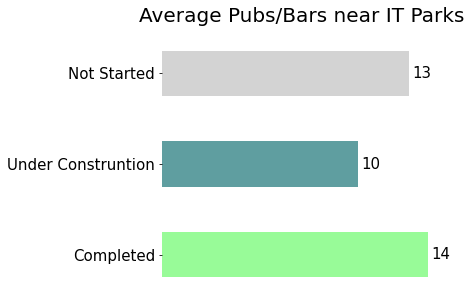

In [41]:
Pubs_mean=pd.DataFrame([("Completed",pivot2["Completed"].mean()),("Under Construntion",pivot2["Under Construction"].mean()),
                       ("Not Started",pivot2["Not Started"].mean())],columns=["Status", "Average bars/pubs"])

# Pubs_mean['Average bars/pubs'] =Pubs_mean['Average bars/pubs'].apply(np.int64)


ax1=(Pubs_mean.plot("Status", "Average bars/pubs",kind="barh",figsize=(5,5),
                    color=['palegreen','cadetblue','lightgrey'],
                    fontsize=15,grid=False,legend=None))


ax1.set_title(fontsize=20,label="Average Pubs/Bars near IT Parks", color='Black')
ax1.spines['left'].set_visible(False)#removing the left border of the chart
ax1.spines['right'].set_visible(False)#removing the right border of the chart
ax1.spines['top'].set_visible(False)#removing the top  border of the chart
ax1.spines['bottom'].set_visible(False)
plt.xticks([])
plt.ylabel(None)


for p in (ax1.patches):
    width,height=p.get_width(),p.get_height()
    x,y=p.get_xy()
    ax1.annotate('{}'.format(round(width)),(x+width+0.2,y+.2),size=15)
    
plt.savefig("mean_pubs_counts.png")

We can observe that there are approx 14 bars/pubs around completed IT parks whereas there are only 10 bar/pubs around under construction. The under construction IT parks are getting built where there are already IT parks, hence the average of pubs and bar is high when compared to IT parks under construction of South of the city.

The 'Not Started' (planned) IT park are mostly near the completed IT parks hence, they have almost same average.

We may also want to look what is the Average & mimimum distance a bar/pub from the IT park, average number of IT park each bar/pubs serves and other aspects.

In [43]:
pivot3=pd.pivot_table(Pubs, values=["location.distance"],index=["IT Park","Area","Status"], aggfunc=['min','mean'])
pivot3.sort_values(pivot3.columns[0], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last').head()

,,,min,mean
,,,location.distance,location.distance
IT Park,Area,Status,,
Navin's WSS Towers,Mount Road,Completed,8,1873.222222
A.R Foundations - Acropolis,Mylapore,Completed,26,1667.404762
Prince Info City II,Kandanchavadi,Completed,54,1825.642857
Prince Infocity,Kandanchavadi,Completed,90,1827.357143
ETL Infrastructure - Chennai One,Thoraipakkam,Completed,121,1581.000000


In [44]:
pivot3.sort_values(pivot3.columns[1], axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last').head()

,,,min,mean
,,,location.distance,location.distance
IT Park,Area,Status,,
Alliance Orchid Tech Park,Ambattur,Not Started,1027,1027.000000
ASV Ramana Tech Park,CIT Nagar,Completed,698,1182.000000
Krishnan Sivagami Trust,Kelambakkam,Under Construction,626,1334.500000
Quanta Engineers,Teynampet,Completed,272,1513.048780
Seshachalam,Teynampet,Under Construction,419,1519.324324


In [45]:
pivot4=pd.pivot_table(Pubs, values="name",index=["IT Park"],aggfunc='count')

In [46]:
pivot5=df[['Company name','Start datecurrent status','Area']]
pivot5.rename(columns={'Company name':'IT Park','Start datecurrent status':"Status"},inplace=True)
Parks_to_Pubs=pd.merge(pivot5,pivot3,on="IT Park",how='left')

F:\Anaconda\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
F:\Anaconda\lib\site-packages\pandas\core\reshape\merge.py:643: UserWarning: merging between different levels can give an unintended result (1 levels on the left,2 on the right)
  warnings.warn(msg, UserWarning)


In [47]:
Parks_to_Pubs=pd.merge(Parks_to_Pubs,pivot4,on="IT Park",how='left')

In [48]:
Parks_to_Pubs.rename(columns={Parks_to_Pubs.columns[-3]:'Closest Bar distance (mts)',Parks_to_Pubs.columns[-2]:'Average bar distance',Parks_to_Pubs.columns[-1]:'Bar/Pub counts'},inplace=True)

<a id="item8"></a>

In [49]:
pd.pivot_table(Parks_to_Pubs,values=['Closest Bar distance (mts)','Average bar distance','Bar/Pub counts'],index=['Status'],aggfunc=['mean'])

mean                 \
                   Average bar distance Bar/Pub counts   
Status                                                   
Completed                   2127.423702      13.840000   
Not Started                 2237.287992      12.857143   
Under Construction          2284.199480      10.192308   

                                               
                   Closest Bar distance (mts)  
Status                                         
Completed                          770.100000  
Not Started                       1326.857143  
Under Construction                1207.692308

Text(0.5, 1.0, 'Average bar/pub distance and bars/pubs count distribution near IT Parks')

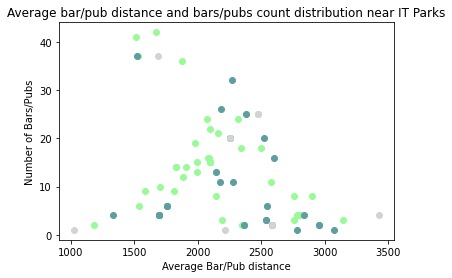

In [50]:
x1=Parks_to_Pubs.loc[Parks_to_Pubs['Status']=='Completed']
x2=Parks_to_Pubs.loc[Parks_to_Pubs['Status']=='Under Construction']
x3=Parks_to_Pubs.loc[Parks_to_Pubs['Status']=='Not Started']

fig,ax3=plt.subplots()
ax3.scatter(x1[x1.columns[-2]], x1[x1.columns[-1]],c='palegreen')
ax3.scatter(x2[x2.columns[-2]], x2[x2.columns[-1]],c='cadetblue')
ax3.scatter(x3[x3.columns[-2]], x3[x3.columns[-1]],c='lightgrey')
ax3.set_xlabel("Average Bar/Pub distance")
ax3.set_ylabel("Number of Bars/Pubs")
ax3.set_title("Average bar/pub distance and bars/pubs count distribution near IT Parks")


<a id="item5"></a>

### <p style="color:blue"> Analysis and Conclusion</p>

1.The average bars/pubs near under constructed in 10 as compared to 14 around completed IT Parks.
The planned (not started) IT park are near the area where there are already pubs/bars and completed IT parks. Hence average is high.<a href="#item6">Table and Chart</a>

2.There are many upcoming IT Parks on the southern borders of the city and it could be a good place to open a pub/bar.
The majority of pubs/bars are around the completed IT parks, with few exceptions.
<a href="#item7">Map</a>

3.There  is clearly a trend with bars/pubs counts near an IT Parks. As distance increase from IT park, the bar/pub count is reduced.
(observe trend for completed IT Parks)
<a href="#item8"> Table and Chart</a>

<b>Hence, opening of Pub/bar within 2200 meters is advisable.</b>
